In [44]:
import argparse
import tensorflow as tf
from collections import deque
import numpy as np
import sys
sys.path.insert(0,'/home/users/rmth/stroke-deep-learning') 
sys.path.insert(0,'/home/users/rmth/') 
from datahandler import DataHandler
from models import CRNN as Model
from config import Config
from models import input_fn
import os

os.chdir('/home/users/rmth/')

In [45]:
def serving_input_receiver_fn():
    '''
    Serving input receiver function for tf.Estimator.export_savedmodel
    :return: a TensorServingInputReceiver fitting the input data specified in cf.hparams
    '''
    features = tf.placeholder(shape=[None, cf.hparams.n_epoch_samples, cf.hparams.n_channels], dtype=tf.float32)
    receiver_tensors = features
    return tf.estimator.export.TensorServingInputReceiver(features, receiver_tensors)

In [46]:
cf = Config('c-shhs',
            'cluster',
            'revised2',
            None).get_configs(cross_validate=None)

DataHandler.setup_partitions(config=cf,
                                 model_memory=False,
                                 cross_validate=None)

Something is wrong with shhs1-202852
Something is wrong with shhs1-201652
Removing existing model: /scratch/users/rmth/tf_logs/c-shhs_cluster_revised2/


In [47]:
print(cf.hparams.optimizer)

<class 'tensorflow.python.training.adam.AdamOptimizer'>


In [48]:
run_config = tf.estimator.RunConfig(save_checkpoints_steps=cf.eparams.save_checkpoint_steps,
                                        save_summary_steps=cf.eparams.save_summary_steps)
model = Model('CRNN', cf.eparams)
classifier = tf.estimator.Estimator(
        model_fn=lambda features, labels, mode: model(features, labels, mode, cf.hparams),
        model_dir=cf.eparams.ckptdir,
        config=run_config)

tf.logging.set_verbosity(tf.logging.INFO)

INFO:tensorflow:Using config: {'_save_checkpoints_secs': None, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_train_distribute': None, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fa6a1f6a7d0>, '_evaluation_master': '', '_save_checkpoints_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_num_ps_replicas': 0, '_tf_random_seed': None, '_master': '', '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_model_dir': '/scratch/users/rmth/tf_logs/c-shhs_cluster_revised2/', '_global_id_in_cluster': 0, '_save_summary_steps': 100}


Doing iteration 0 of train and eval steps.
Training:
INFO:tensorflow:Calling model_fn.
X: (?, 2, 60, 1, 625)
conv_block_1/conv1: (?, 8, 60, 1, 618)
conv_block_1/conv2: (?, 8, 60, 1, 611)
conv_block_1/pool: (?, 8, 60, 1, 151)
conv_block_2/conv1: (?, 16, 60, 1, 144)
conv_block_2/conv2: (?, 16, 60, 1, 137)
conv_block_2/pool: (?, 16, 60, 1, 33)
rnn_input: (?, 60, 528)
rnn_output: (?, 60, 8)
dense_input: (?, 60, 8)
INFO:tensorflow:Scale of 0 disables regularizer.
network output: (?, 60, 64)
logits: (?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /scratch/users/rmth/tf_logs/c-shhs_cluster_revised2/model.ckpt.
INFO:tensorflow:loss = 0.715069, step = 0
INFO:tensorflow:Mode: train, Step: 0000, loss: 0.7151, accuracy: 0.50
INFO:tensorflow:Mode: train, Step: 0025, loss: 0.7020, accuracy: 0.50

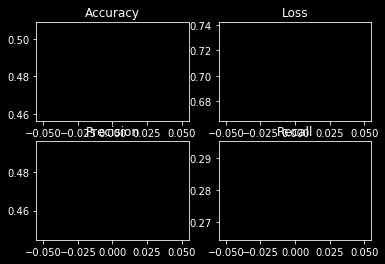

Doing iteration 1 of train and eval steps.
Training:
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Scale of 0 disables regularizer.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /scratch/users/rmth/tf_logs/c-shhs_cluster_revised2/model.ckpt-100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 101 into /scratch/users/rmth/tf_logs/c-shhs_cluster_revised2/model.ckpt.
INFO:tensorflow:loss = 0.7043805, step = 100
INFO:tensorflow:Mode: train, Step: 0100, loss: 0.7044, accuracy: 0.38
INFO:tensorflow:Mode: train, Step: 0125, loss: 0.7318, accuracy: 0.50
INFO:tensorflow:Mode: train, Step: 0150, loss: 0.7617, accuracy: 0.25
INFO:tensorflow:Mode: train, Step: 0175, loss: 0.7160, accuracy: 0.38
INFO:tensorflow:Saving checkpoints for 200 into /scratch/users/rmth/tf_logs/c-shhs_cluster_revised2/model.ckpt.
INF

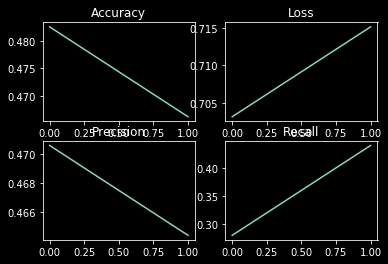

Doing iteration 2 of train and eval steps.
Training:
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Scale of 0 disables regularizer.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /scratch/users/rmth/tf_logs/c-shhs_cluster_revised2/model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 201 into /scratch/users/rmth/tf_logs/c-shhs_cluster_revised2/model.ckpt.
INFO:tensorflow:loss = 0.5725107, step = 200
INFO:tensorflow:Mode: train, Step: 0200, loss: 0.5725, accuracy: 0.88
INFO:tensorflow:Mode: train, Step: 0225, loss: 0.6516, accuracy: 0.62
Reshuffling for: shhs1-201050
INFO:tensorflow:Mode: train, Step: 0250, loss: 0.6982, accuracy: 0.38
INFO:tensorflow:Mode: train, Step: 0275, loss: 0.6840, accuracy: 0.62
INFO:tensorflow:Saving checkpoints for 300 into /scratch/users/rmth/tf_logs/c-shhs_cl

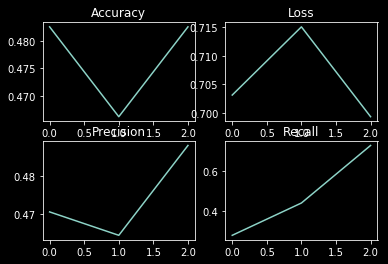

Doing iteration 3 of train and eval steps.
Training:
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Scale of 0 disables regularizer.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /scratch/users/rmth/tf_logs/c-shhs_cluster_revised2/model.ckpt-300
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 301 into /scratch/users/rmth/tf_logs/c-shhs_cluster_revised2/model.ckpt.
INFO:tensorflow:loss = 0.67755276, step = 300
INFO:tensorflow:Mode: train, Step: 0300, loss: 0.6776, accuracy: 0.50
INFO:tensorflow:Mode: train, Step: 0325, loss: 0.6093, accuracy: 0.75
INFO:tensorflow:Mode: train, Step: 0350, loss: 0.6280, accuracy: 0.50
INFO:tensorflow:Mode: train, Step: 0375, loss: 0.6817, accuracy: 0.62
INFO:tensorflow:Saving checkpoints for 400 into /scratch/users/rmth/tf_logs/c-shhs_cluster_revised2/model.ckpt.
IN

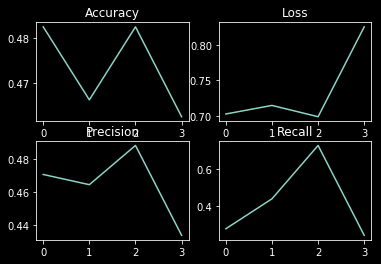

Doing iteration 4 of train and eval steps.
Training:
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Scale of 0 disables regularizer.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /scratch/users/rmth/tf_logs/c-shhs_cluster_revised2/model.ckpt-400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Reshuffling for: shhs1-201050
INFO:tensorflow:Saving checkpoints for 401 into /scratch/users/rmth/tf_logs/c-shhs_cluster_revised2/model.ckpt.
INFO:tensorflow:loss = 0.63264036, step = 400
INFO:tensorflow:Mode: train, Step: 0400, loss: 0.6326, accuracy: 0.62
Reshuffling for: shhs1-201229
INFO:tensorflow:Mode: train, Step: 0425, loss: 0.6936, accuracy: 0.50
INFO:tensorflow:Mode: train, Step: 0450, loss: 0.7014, accuracy: 0.50
INFO:tensorflow:Mode: train, Step: 0475, loss: 0.6865, accuracy: 0.62
Reshuffling for: shhs1-202371
INFO:tensorflow:Saving c

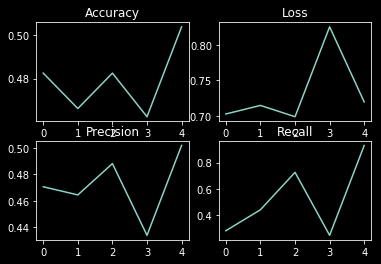

Doing iteration 5 of train and eval steps.
Training:
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Scale of 0 disables regularizer.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /scratch/users/rmth/tf_logs/c-shhs_cluster_revised2/model.ckpt-500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Reshuffling for: shhs1-201225
INFO:tensorflow:Saving checkpoints for 501 into /scratch/users/rmth/tf_logs/c-shhs_cluster_revised2/model.ckpt.
INFO:tensorflow:loss = 0.673493, step = 500
INFO:tensorflow:Mode: train, Step: 0500, loss: 0.6735, accuracy: 0.62
Reshuffling for: shhs1-201050
INFO:tensorflow:Mode: train, Step: 0525, loss: 0.6281, accuracy: 0.38
INFO:tensorflow:Mode: train, Step: 0550, loss: 0.6605, accuracy: 0.50
INFO:tensorflow:Mode: train, Step: 0575, loss: 0.6469, accuracy: 0.75
Reshuffling for: shhs1-201631
Reshuffling for: shhs1-203

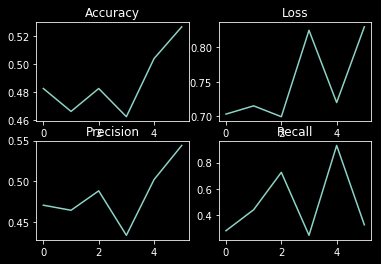

Doing iteration 6 of train and eval steps.
Training:
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Scale of 0 disables regularizer.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /scratch/users/rmth/tf_logs/c-shhs_cluster_revised2/model.ckpt-600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Reshuffling for: shhs1-203188
Reshuffling for: shhs1-202518
INFO:tensorflow:Saving checkpoints for 601 into /scratch/users/rmth/tf_logs/c-shhs_cluster_revised2/model.ckpt.
INFO:tensorflow:loss = 0.66133296, step = 600
INFO:tensorflow:Mode: train, Step: 0600, loss: 0.6613, accuracy: 0.50
INFO:tensorflow:Mode: train, Step: 0625, loss: 0.5760, accuracy: 0.50
Reshuffling for: shhs1-205013
Reshuffling for: shhs1-202805
INFO:tensorflow:Mode: train, Step: 0650, loss: 0.6140, accuracy: 0.62
INFO:tensorflow:Mode: train, Step: 0675, loss: 0.7647, accuracy:

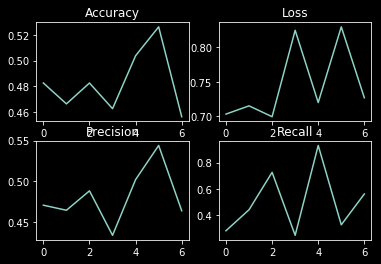

Doing iteration 7 of train and eval steps.
Training:
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Scale of 0 disables regularizer.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /scratch/users/rmth/tf_logs/c-shhs_cluster_revised2/model.ckpt-700
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Reshuffling for: shhs1-202011
Reshuffling for: shhs1-201199
INFO:tensorflow:Saving checkpoints for 701 into /scratch/users/rmth/tf_logs/c-shhs_cluster_revised2/model.ckpt.
INFO:tensorflow:loss = 0.5927495, step = 700
INFO:tensorflow:Mode: train, Step: 0700, loss: 0.5927, accuracy: 0.62
Reshuffling for: shhs1-201926
INFO:tensorflow:Mode: train, Step: 0725, loss: 0.8130, accuracy: 0.38
INFO:tensorflow:Mode: train, Step: 0750, loss: 0.5997, accuracy: 0.62
Reshuffling for: shhs1-202578
INFO:tensorflow:Mode: train, Step: 0775, loss: 0.5730, accuracy: 

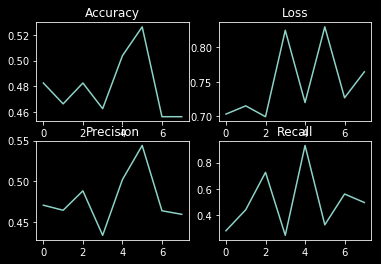

Doing iteration 8 of train and eval steps.
Training:
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Scale of 0 disables regularizer.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /scratch/users/rmth/tf_logs/c-shhs_cluster_revised2/model.ckpt-800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Reshuffling for: shhs1-201480
Reshuffling for: shhs1-201969
Reshuffling for: shhs1-204291
Reshuffling for: shhs1-202169
Reshuffling for: shhs1-201393
Reshuffling for: shhs1-201050
INFO:tensorflow:Saving checkpoints for 801 into /scratch/users/rmth/tf_logs/c-shhs_cluster_revised2/model.ckpt.
INFO:tensorflow:loss = 0.8714679, step = 800
INFO:tensorflow:Mode: train, Step: 0800, loss: 0.8715, accuracy: 0.25
Reshuffling for: shhs1-203198
Reshuffling for: shhs1-201530
Reshuffling for: shhs1-202219
INFO:tensorflow:Mode: train, Step: 0825, loss: 0.6834, 

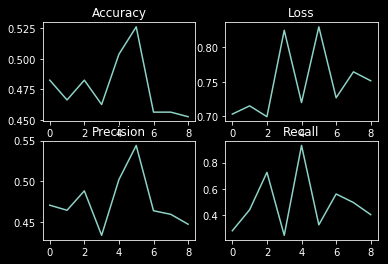

Doing iteration 9 of train and eval steps.
Training:
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Scale of 0 disables regularizer.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /scratch/users/rmth/tf_logs/c-shhs_cluster_revised2/model.ckpt-900
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Reshuffling for: shhs1-205388
Reshuffling for: shhs1-204095
Reshuffling for: shhs1-201344
Reshuffling for: shhs1-205090
Reshuffling for: shhs1-201840
Reshuffling for: shhs1-201703
Reshuffling for: shhs1-201548
Reshuffling for: shhs1-205507
Reshuffling for: shhs1-204225
Reshuffling for: shhs1-201223
INFO:tensorflow:Saving checkpoints for 901 into /scratch/users/rmth/tf_logs/c-shhs_cluster_revised2/model.ckpt.
INFO:tensorflow:loss = 0.723017, step = 900
INFO:tensorflow:Mode: train, Step: 0900, loss: 0.7230, accuracy: 0.50
Reshuffling for: shhs1-201

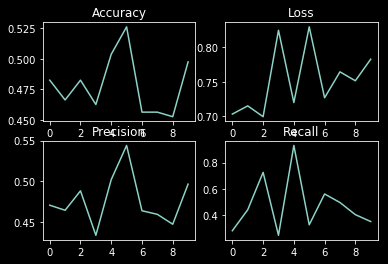

Reached early stopping criterion at 10 iterations.
Doing iteration 10 of train and eval steps.
Training:
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Scale of 0 disables regularizer.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /scratch/users/rmth/tf_logs/c-shhs_cluster_revised2/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Reshuffling for: shhs1-205689
Reshuffling for: shhs1-202371
Reshuffling for: shhs1-200200
INFO:tensorflow:Saving checkpoints for 1001 into /scratch/users/rmth/tf_logs/c-shhs_cluster_revised2/model.ckpt.
INFO:tensorflow:loss = 0.82687926, step = 1000
INFO:tensorflow:Mode: train, Step: 1000, loss: 0.8269, accuracy: 0.38
Reshuffling for: shhs1-201050
Reshuffling for: shhs1-201225
INFO:tensorflow:Mode: train, Step: 1025, loss: 0.6289, accuracy: 0.75
INFO:tensorflow:Mode: train, Step: 1050, loss: 0.

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
loss_buffer_size = 5
smoothed_loss_values = np.ones([2])

test_accuracies = []
test_losses = []
test_precision = []
test_recall = []

tolerance = 1e-2
early_stop_criterion = False
iteration = 0
max_steps = 1e4
train_steps = 100
eval_steps = 100
min_iterations = 10
max_iterations = max_steps // train_steps
while True:
    print('Doing iteration {} of train and eval steps.'.format(iteration))
    
    print('Training:')
    classifier.train(input_fn=lambda: input_fn('train', cf.eparams), steps=train_steps)
    
    print('Evaluation:')
    eval_results = classifier.evaluate(input_fn=lambda: input_fn('val', cf.eparams), steps=eval_steps)
    print('Evaluational loss result: {}.'.format(eval_results['loss']))

    if iteration == 0:
        l = deque(eval_results['loss']*np.ones([loss_buffer_size]))
    
    test_accuracies.append(eval_results['accuracy'])
    test_losses.append(eval_results['loss'])
    test_precision.append(eval_results['precision'])
    test_recall.append(eval_results['recall'])
    
    smoothed_loss_values[0] = np.mean(l)
    l.popleft()
    l.append(eval_results['loss'])
    smoothed_loss_values[1] = np.mean(l)
    iteration += 1
    
    print('Loss  deque: {}'.format(l))
    print('Smoothed loss values: {}'.format(smoothed_loss_values))
    
    fig, ax = plt.subplots(2, 2)
    ax[0, 0].plot(test_accuracies)
    ax[0, 0].set_title('Accuracy')
    ax[0, 1].plot(test_losses)
    ax[0, 1].set_title('Loss')
    ax[1, 0].plot(test_precision)
    ax[1, 0].set_title('Precision')
    ax[1, 1].plot(test_recall)
    ax[1, 1].set_title('Recall')
    plt.show()
    if iteration < min_iterations:
        continue
    if iteration > max_iterations:
        test_mean_accuracy = np.mean(test_accuracies[-10:])
        if test_mean_accuracy < 0.5:
            print('Accuracy is below 50 % ({}).'.format(test_mean_accuracy))
            cf = Config('c-shhs',
                'cluster',
                'small',
                None).get_configs(cross_validate=None)

            DataHandler.setup_partitions(config=cf,
                                             model_memory=False,
                                             cross_validate=None)
            
            classifier = tf.estimator.Estimator(
                model_fn=lambda features, labels, mode: model(features, labels, mode, cf.hparams),
                model_dir=cf.eparams.ckptdir,
                config=run_config)
            iteration = 0
            test_accuracies = []
            test_losses = []
            test_precision = []
            test_recall = []
            print('****************Restarting****************')
            continue
        print('Reached maximum iterations.')
        break
    early_stop_criterion = (smoothed_loss_values[0]-smoothed_loss_values[1]) < tolerance
    if early_stop_criterion:
        print('Reached early stopping criterion at {} iterations.'.format(iteration))
    